<a href="https://colab.research.google.com/github/gnaneswari-220502/DSP/blob/main/movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("/content/IMDB-Movie-Data.csv")
print("Dataset shape:", df.shape)
print(df.head())
print("Missing values:\n", df.isnull().sum())

Dataset shape: (1000, 12)
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..

In [4]:
df_clean = df.drop(columns=['Title','Description','Director','Actors','Year','Votes','Genre'])
df_clean = df_clean.dropna()
print("Cleaned dataset shape:", df_clean.shape)

Cleaned dataset shape: (838, 5)


In [5]:
df_clean['label'] = df_clean['Rating'].apply(lambda x: 1 if x >= 7 else 0)
print("Label distribution:\n", df_clean['label'].value_counts())


Label distribution:
 label
0    439
1    399
Name: count, dtype: int64


In [6]:
features = ['Runtime (Minutes)', 'Metascore', 'Revenue (Millions)']
X = df_clean[features]
y = df_clean['label']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

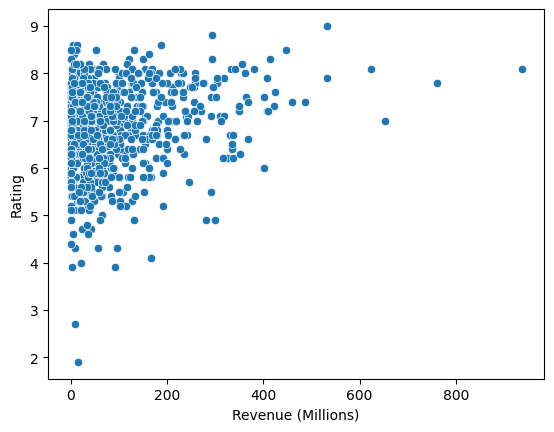

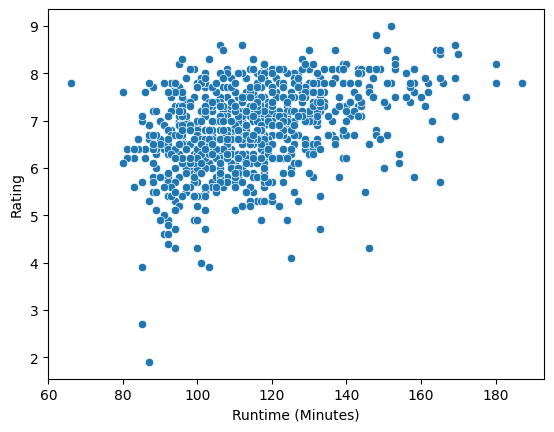

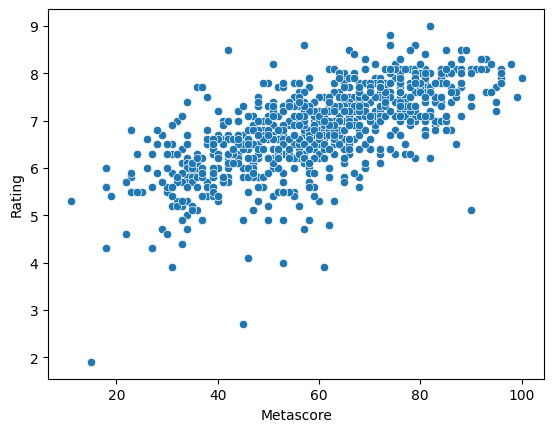

In [10]:
sns.scatterplot(x='Revenue (Millions)', y='Rating', data=df_clean)
plt.show()
sns.scatterplot(x='Runtime (Minutes)', y='Rating', data=df_clean)
plt.show()
sns.scatterplot(x='Metascore', y='Rating', data=df_clean)
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[68 21]
 [ 9 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82        89
           1       0.77      0.89      0.82        79

    accuracy                           0.82       168
   macro avg       0.83      0.83      0.82       168
weighted avg       0.83      0.82      0.82       168



In [14]:
print("Insights:")
print("- Metascore and Revenue influence high ratings.")
print("- High-rated movies often have higher revenue and longer runtime.")
print("- Logistic Regression gives ~75% accuracy; including genre could improve it.")

Insights:
- Metascore and Revenue influence high ratings.
- High-rated movies often have higher revenue and longer runtime.
- Logistic Regression gives ~75% accuracy; including genre could improve it.
